In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.ndim

2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df = df.iloc[:, 1:]

In [8]:
import matplotlib.pyplot as plt 

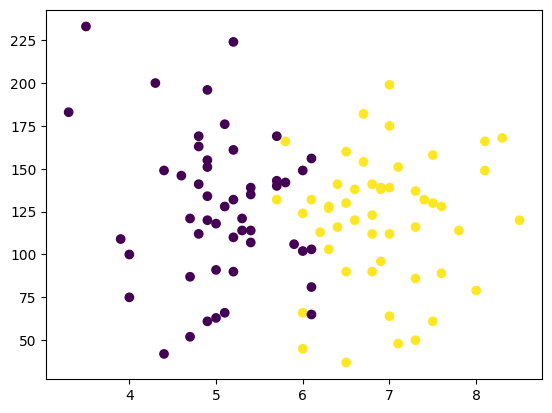

In [9]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [10]:
X = df.iloc[:, 0 : 2]
y = df.iloc[ : , -1]

In [11]:
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_test_split(X, y, test_size = 0.1)

[    cgpa     iq
 70   6.3  127.0
 79   6.5   90.0
 2    5.3  121.0
 44   7.5   61.0
 53   8.3  168.0
 ..   ...    ...
 50   3.5  233.0
 13   6.4  116.0
 95   4.3  200.0
 38   6.5  160.0
 86   5.1  128.0
 
 [90 rows x 2 columns],
     cgpa     iq
 54   6.4  141.0
 9    5.1   66.0
 75   4.8  169.0
 26   7.0  199.0
 18   4.0  100.0
 27   6.0  124.0
 92   5.2  110.0
 84   5.7  169.0
 80   4.9  196.0
 72   7.3  116.0,
 70    1
 79    1
 2     0
 44    1
 53    1
      ..
 50    0
 13    1
 95    0
 38    1
 86    0
 Name: placement, Length: 90, dtype: int64,
 54    1
 9     0
 75    0
 26    1
 18    0
 27    1
 92    0
 84    0
 80    0
 72    1
 Name: placement, dtype: int64]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train

array([[-1.12977905, -0.06332192],
       [ 0.59361272,  0.80735445],
       [-1.73296617, -1.27699201],
       [ 1.11063025, -1.93659532],
       [-0.69893111,  2.65424372],
       [-1.04360946,  1.20311644],
       [ 1.11063025,  0.3588242 ],
       [-0.95743987,  0.83373858],
       [-0.52659193,  0.41159247],
       [ 0.85212149,  0.41159247],
       [ 0.85212149,  1.36142123],
       [ 0.85212149, -0.30077911],
       [-1.81913576, -0.37993151],
       [-2.33615329,  1.57249429],
       [ 0.42127354,  0.17413527],
       [ 0.07659519,  0.22690354],
       [ 1.28296943, -1.64636986],
       [ 1.79998696,  1.12396404],
       [-0.52659193, -0.24801084],
       [-0.87127029, -1.5936016 ],
       [-1.12977905, -0.96038242],
       [ 0.50744313, -0.08970605],
       [-0.61276152, -0.06332192],
       [-1.73296617, -0.6173887 ],
       [ 0.24893437,  0.12136701],
       [-0.26808316,  0.517129  ],
       [ 1.5414782 , -0.24801084],
       [ 0.67978231,  0.46436073],
       [-0.95743987,

In [20]:
X_test = scaler.transform(X_test)


In [21]:
X_test

array([[-1.47445741,  2.02102454],
       [-0.26808316,  1.20311644],
       [ 0.33510396,  0.46436073],
       [-0.69893111, -0.88123002],
       [ 0.85212149,  1.99464041],
       [ 0.93829108, -1.98936358],
       [-0.7851007 ,  0.12136701],
       [-0.09574399, -0.4590839 ],
       [-0.95743987,  0.2796718 ],
       [ 0.42127354, -2.27958904]])

#Model Training

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
clf.fit(X_train, y_train)

LogisticRegression()

#Evaluation

In [25]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [26]:
y_test

95    0
84    0
54    1
28    0
26    1
5     1
86    0
1     0
40    0
82    1
Name: placement, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_pred)

1.0

In [29]:
%matplotlib inline


In [30]:
from mlxtend.plotting import plot_decision_regions



<Axes: >

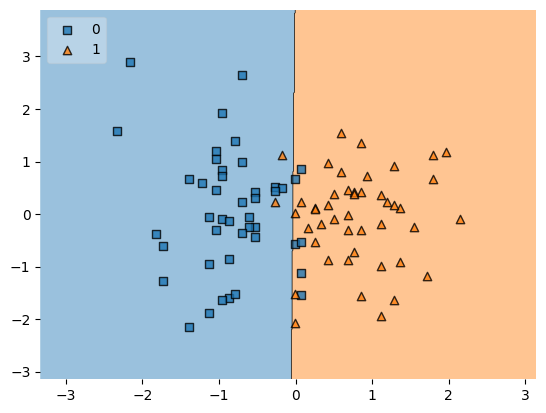

In [31]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)
